# Functions

- How to define a function in Python
- Local vs global variables
- Default Argument Values
- Keyword Arguments
- Arbitrary Argument Lists
- Unpacking Argument Lists

## How to define a function in Python

The keyword **def** introduces a function definition. It must be followed by the function name and the parenthesized list of formal parameters:

In [1]:
def print_sequence(start, end, step):
    """Print a sequence"""
    x = start
    while x < end:
        print(x, end=' ')
        x += step

print_sequence(0, 10, 2)

0 2 4 6 8 

The keyword **return** is used to return a value:

In [2]:
def get_sequence(start, end, step):
    """Return a sequence"""
    seq, next_elem = [], start
    while next_elem < end:
        seq += [next_elem]
        next_elem += step
    return seq

seq = get_sequence(0, 10, 2)
print(seq)

[0, 2, 4, 6, 8]


**Note**: it is allowed to return several values:

In [3]:
# Note: this function already exists in Python
def divmod(a, b):
    """Return the quotient and the remainder of the division of two numbers"""
    return a // b, a % b

quotient, remainder = divmod(25, 3)
print(quotient, remainder)

8 1


## Local vs global variables

### Simple types (int, float, boolean)

Let's define a function to increment the value of a variable and see what happens when we use it:

In [4]:
i = 0
print("at initialization:        ", i)

def increment(i):
    i += 1
    print("inside increment function:", i)

increment(i)
print("after calling increment:  ", i)

at initialization:         0
inside increment function: 1
after calling increment:   0


### Python namespaces

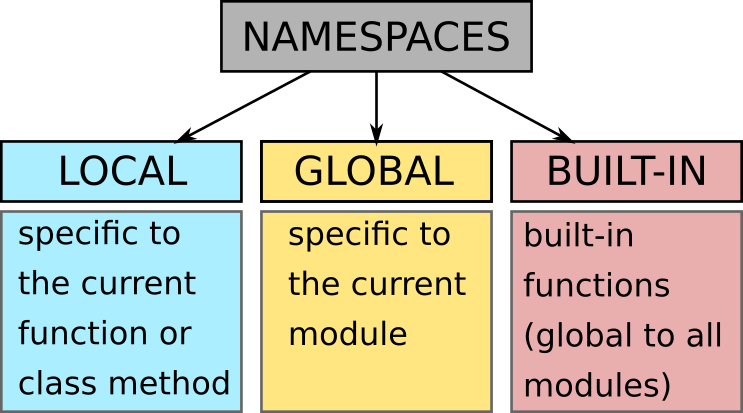

<font color=red>**All variable assignments (e.g. x = 5) in a function create or act on local variables**</font>

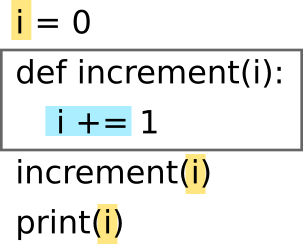

Indeed, using the builtin function [id](https://docs.python.org/3.5/library/functions.html#id), we see:

In [5]:
i = 0
print("at initialization:             ", id(i))

def increment(i):
    print("before assignment in increment:", id(i))
    # assignment creates a new local 'i' variable
    i += 1
    print("after assignment in increment: ", id(i))

increment(i)
print("after calling increment:       ", id(i))

at initialization:              139943097608608
before assignment in increment: 139943097608608
after assignment in increment:  139943097608640
after calling increment:        139943097608608


<font color=red>**Access to variables first look in the local namespace (function), then in the global namespace (module)**</font>:

In [6]:
i = 0
step = 1
print("step at initialization:          ", step)

def change_step(value):
    # assignment creates a local 'step' variable
    step = value
    print("step inside change_step function:", step)

def increment(i):
    # variables defined at module level are accessible in functions
    return i + step
    
change_step(2)
print("step after calling change_step:  ", step, "\n")

print("i:       ", i)
i = increment(i)
print("i + step:", i)

step at initialization:           1
step inside change_step function: 2
step after calling change_step:   1 

i:        0
i + step: 1


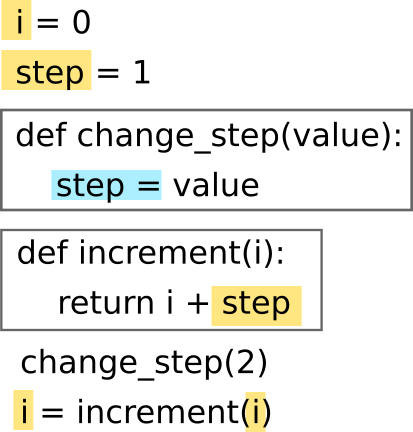

### Sequence types ( list, tuple, set, dict, ...) + other composed objects

What about lists, dictionaries and composed objects arguments? 

In [8]:
my_list = [0, 1, 2, 3, 4]
print(my_list)

def swap(pos1, pos2, a_list):
    """Swap two elements of a list"""
    # Working on elements of the list doesn't create a local variable
    a_list[pos2], a_list[pos1] = a_list[pos1], a_list[pos2]

swap(1, 3, my_list)
print(my_list)

[0, 1, 2, 3, 4]
[0, 3, 2, 1, 4]


<font color=red>**Assignments of elements of a list, dict, ... variable (e.g. x[1:4] = [4, 5, 6]) does not create a new local variable**</font>

[image]

Using function [id](https://docs.python.org/3.5/library/functions.html#id):

In [10]:
my_list = [0, 1, 2, 3, 4]
print("at initialization:               ", id(my_list))

def swap(pos1, pos2, a_list):
    print("before swapping elements in swap:", id(a_list))
    a_list[pos2], a_list[pos1] = a_list[pos1], a_list[pos2]
    print("after swapping elements in swap: ", id(a_list))

swap(1, 3, my_list)
print("after call of swap function:     " , id(my_list))

at initialization:                140616228189448
before swapping elements in swap: 140616228189448
after swapping elements in swap:  140616228189448
after call of swap function:      140616228189448


If you try to reassign the whole list, dict or composed object, you'll get in trouble:

In [9]:
list_1 = [0, 1, 2, 3, 4]
list_2 = [5, 6, 7]

# Note: In the real world, you should use the method `extend` of list
def extend(list_1, list_2):
    # the whole list 'list_1' is reassigned --> a local 'list_1' variable is created
    list_1 = list_1 + list_2
    print("inside function:    ", list_1)
    
print("Extend list {} with list {}:".format(list_1, list_2))

extend(list_1, list_2)
print("after function call:", list_1)

Extend list [0, 1, 2, 3, 4] with list [5, 6, 7]:
inside function:     [0, 1, 2, 3, 4, 5, 6, 7]
after function call: [0, 1, 2, 3, 4]


[image]

Using function [id](https://docs.python.org/3.5/library/functions.html#id):

In [27]:
list_1 = [0, 1, 2, 3, 4]
list_2 = [5, 6, 7]
print('before calling function:          ', id(list_1), id(list_2))

# In the real world, you should use the method `extend` of list
def extend(list_1, list_2):
    print('inside extend - before assignment:', id(list_1), id(list_2))
    # the whole list 'list_1' is reassigned --> a local 'list_1' variable is created
    list_1 = list_1 + list_2
    print('inside extend - after assignment: ', id(list_1), id(list_2))

extend(list_1, list_2)
print('after calling function:           ', id(list_1), id(list_2))

before calling function:           139942859559560 139942962241096
inside extend - before assignment: 139942859559560 139942962241096
inside extend - after assignment:  139942859561288 139942962241096
after calling function:            139942859559560 139942962241096


### What to remember?

- <font color=red>**Access to variables first look in the local namespace (function), then in the global namespace (module)**</font>
- <font color=red>**Variable assignments (e.g. x = 5) in a function create or act on local variables**</font>
- <font color=red>**Assignments of elements of a list, dict, ... variable (e.g. x[1:4] = [4, 5, 6]) does not create a new local variable**</font>

<font color=red>**TIPS: [Global variables are dangerous](http://wiki.c2.com/?GlobalVariablesAreBad). Use them as read-only variables in functions or, if you need to modify them, pass them as arguments and return them at the end of functions**</font>

## Default Argument Values

It is possible to set a value by default to some arguments of a function:

In [11]:
def get_sequence(start, end, step=1):
    """Return a sequence"""
    seq, next_elem = [], start
    while next_elem < end:
        seq += [next_elem]
        next_elem += step
    return seq

# if no value provided for step, it will be 1 by default
seq = get_sequence(0, 10)
print(seq)
# passing a value different from 1 for argument step 
seq = get_sequence(0, 10, 2)
print(seq)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 2, 4, 6, 8]


<font color=red>**WARNING**: arguments with default values come always after all the others.</font></div> 

In [29]:
def get_sequence(start=0, end, step):
    """Return a sequence"""
    seq, next_elem = [], start
    while next_elem < end:
        seq += [next_elem]
        next_elem += step
    return seq

seq = get_sequence(10, 2)
print(seq)

SyntaxError: non-default argument follows default argument (<ipython-input-29-5ab85da3ae92>, line 1)

What about default value of composed type like list or dictionary?

In [30]:
# Wrong way
def new_list_wrong_way(value, new_list=[]):
    new_list.append(value)
    return new_list

print('Expected [1]. Got {}'.format(new_list_wrong_way(1)))
print('Expected [2]. Got {}'.format(new_list_wrong_way(2)))
print('Expected [3]. Got {}'.format(new_list_wrong_way(3)))

Expected [1]. Got [1]
Expected [2]. Got [1, 2]
Expected [3]. Got [1, 2, 3]


<font color=red>**WARNING**: The default value is evaluated only once</font>. 
This leads to an unexpected behavior when the default value is an object of composed type such as a list or dictionary. 
<font color=red>For arguments expecting a list or dict or composed object as default value, use None instead and set the default value at the beginning of the function</font>.

In [31]:
# Right way
def new_list_right_way(a, new_list=None):
    if new_list is None:
        new_list = []
    new_list.append(a)
    return new_list

print('Expected [1]. Got {}'.format(new_list_right_way(1)))
print('Expected [2]. Got {}'.format(new_list_right_way(2)))
print('Expected [3]. Got {}'.format(new_list_right_way(3)))

Expected [1]. Got [1]
Expected [2]. Got [2]
Expected [3]. Got [3]


## Keyword Arguments

When a function is called, values must be passed in the order of arguments as in the function definition:

In [32]:
def get_sequence(start, end, step=1):
    """Return a sequence"""
    seq, next_elem = [], start
    while next_elem < end:
        seq += [next_elem]
        next_elem += step
    return seq


res = get_sequence(0, 10, 2)
print(res)

[0, 2, 4, 6, 8]


But functions can also be called using keyword arguments of the form **kwarg=value**. It is then possible to pass argument in any order:

In [33]:
res = get_sequence(end=10, step=2, start=0)
print(res)

[0, 2, 4, 6, 8]


It is even possible to mix positional and keyword arguments:

In [34]:
res = get_sequence(0, step=2, end=10)     # 1 positional + 2 keyword args
print(res)

[0, 2, 4, 6, 8]


<font color=red>**WARNING**: positional arguments must always be passed first</font>:

In [35]:
get_sequence(step=2, end=10, 0)     # 2 keyword + 1 positional args --> WRONG!
print(res)

SyntaxError: positional argument follows keyword argument (<ipython-input-35-c79a3f2ddb6f>, line 1)

## Arbitrary Argument Lists

When a final formal parameter of the form **\*\*kwargs** is present, it receives a **dictionary containing** all **keyword arguments** except for those corresponding to a formal parameter. A formal parameter of the form **\*args** receives a **tuple containing** the **positional arguments** beyond the formal parameter list. (**\*args must occur before \*\*kwargs**) 

```python
def join_sequence(*sequences, **kwargs):
    """join sequences"""
    seq = []
    # iterate over positional arguments
    for s in sequences:
        seq += s
    # extract keyword arguments
    reverse = kwargs.get('reverse', False)
    if reverse:
        return seq[::-1]
    else:
        return seq
```

In [36]:
def join_sequence(*sequences, **kwargs):
    """join sequences"""
    seq = []
    # iterate over positional arguments
    for s in sequences:
        seq += s
    # extract keyword arguments
    reverse = kwargs.get('reverse', False)
    if reverse:
        return seq[::-1]
    else:
        return seq


seq1, seq2, seq3 = get_sequence(0, 10, 2), get_sequence(10, 20, 3), get_sequence(20, 25)
print("let's join {}, {} and {}:".format(seq1, seq2, seq3))

res = join_sequence(seq1, seq2, seq3)
print(res)

print("\nwith reverse option:")
res = join_sequence(seq1, seq2, seq3, reverse=True)
print(res)

let's join [0, 2, 4, 6, 8], [10, 13, 16, 19] and [20, 21, 22, 23, 24]:
[0, 2, 4, 6, 8, 10, 13, 16, 19, 20, 21, 22, 23, 24]

with reverse option:
[24, 23, 22, 21, 20, 19, 16, 13, 10, 8, 6, 4, 2, 0]


## Unpacking Argument Lists

The reverse situation occurs when the arguments are in a lists, tuples or dictionarues but need to be passed to a function requiring separate positional arguments. In that case, arguments must be *unpacked*.

```python
def join_two_sequences(seq1, seq2, reverse=False):
    """join two sequences"""
    if reverse:
        return (seq1 + seq2)[::-1]
    else:
        return seq1 + seq2
```

In [37]:
def join_two_sequences(seq1, seq2, reverse=False):
    """join two sequences"""
    if reverse:
        return (seq1 + seq2)[::-1]
    else:
        return seq1 + seq2
    
print('unpack list')
sequences = [[0, 2, 4], [6, 8]]
res = join_two_sequences(*sequences)
print('join_two_sequences(*sequences):', res)

print('\nunpack dict')
sequences = {'seq1': [0, 2, 4], 'seq2': [6, 8], 'reverse': True}
res = join_two_sequences(**sequences)
print('join_two_sequences(**sequences):', res)

print('\nmixing list and dict unpacking')
sequences, reverse = [[0, 2, 4], [6, 8]], {'reverse': True}
res = join_sequence(*sequences, **reverse)
print('join_sequence(*sequences, **reverse):', res)

unpack list
join_two_sequences(*sequences): [0, 2, 4, 6, 8]

unpack dict
join_two_sequences(**sequences): [8, 6, 4, 2, 0]

mixing list and dict unpacking
join_sequence(*sequences, **reverse): [8, 6, 4, 2, 0]


## More infos on defining functions?

See the [official documentation of Python (3.5)](https://docs.python.org/3.5/tutorial/controlflow.html#defining-functions)